In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('/content/Titanic-Dataset.csv')

In [51]:
train.isna().sum()#age cabin embark
# train.Embarked.info()
#numerical mean
#string mode

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,165
SibSp,46
Parch,213
Ticket,0
Fare,164


In [6]:
train['Age']=train['Age'].fillna(train['Age'].mean())
train['Cabin']=train['Cabin'].fillna(train['Cabin'].mode()[0])
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [7]:
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
train['Name']=le.fit_transform(train['Name'])
train['Sex']=le.fit_transform(train['Sex'])
train['Ticket']=le.fit_transform(train['Ticket'])
train['Cabin']=le.fit_transform(train['Cabin'])
train['Embarked']=le.fit_transform(train['Embarked'])

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [18]:
train.columns
cols=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
for i in cols:
  train[i]=mm.fit_transform(train[[i]])

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

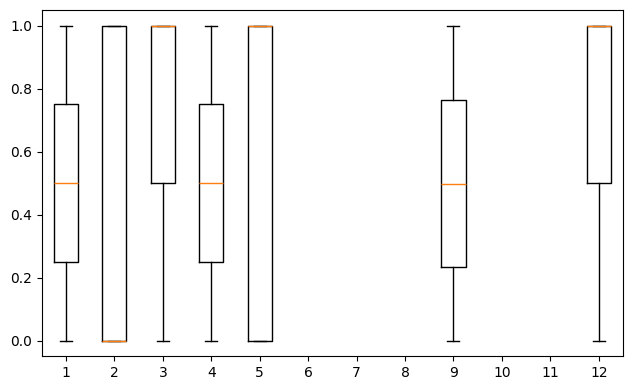

In [53]:
plt.figure(figsize=(7.5, 4.5))
plt.boxplot(train[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']])# Age SibSp Ticket Fare cabin
plt.show()

In [52]:
#IQR Q3-Q1
#Q1=25th percent
#Q3=75th percent
col=['Age', 'SibSp', 'Ticket', 'Fare', 'Cabin','Parch']

for i in col:
  Q1=train[i].quantile(0.25)
  Q3=train[i].quantile(0.75)
  IQR=Q3-Q1
  lower=Q1-1.5*IQR
  upper=Q3+1.5*IQR
  train[i]=train[(train[i]>=lower) & (train[i]<=upper)][i]